<a href="https://colab.research.google.com/github/FabioSicca/Organizacion-de-datos/blob/main/Parte2_TP2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Parte II - Machine Learning Baseline (5 puntos)**

Utilice todas las columnas del dataset (exceptuando columnas que no tenga sentido usar para predecir) con algún encoding donde sea necesario para entrenar una regresión logística, utilizando búsqueda de hiperparametros y garantizando la reproducibilidad de los resultados cuando el notebook corriera varias veces. Conteste las preguntas:

* ¿Cuál es el mejor score de validación obtenido? (¿Cómo conviene obtener el dataset para validar?)
* Al predecir con este modelo para test, ¿Cúal es el score obtenido? (guardar el csv con predicciones para entregarlo después)
* ¿Qué features son los más importantes para predecir con el mejor modelo? Graficar.

In [ ]:
import pandas as pd
!pip install category_encoders
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from category_encoders.binary import BinaryEncoder

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 5.2 MB/s eta 0:00:00


In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/secondary_data.csv', sep=";")

In [ ]:
X = df.drop('class', axis=1)
y = df['class']

In [ ]:
X

,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,15.26,x,g,o,f,e,NaN,w,16.95,17.09,s,y,w,u,w,t,g,NaN,d,w
1,16.60,x,g,o,f,e,NaN,w,17.99,18.19,s,y,w,u,w,t,g,NaN,d,u
2,14.07,x,g,o,f,e,NaN,w,17.80,17.74,s,y,w,u,w,t,g,NaN,d,w
3,14.17,f,h,e,f,e,NaN,w,15.77,15.98,s,y,w,u,w,t,p,NaN,d,w
4,14.64,x,h,o,f,e,NaN,w,16.53,17.20,s,y,w,u,w,t,p,NaN,d,w
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61064,1.18,s,s,y,f,f,f,f,3.93,6.22,NaN,NaN,y,NaN,NaN,f,f,NaN,d,a
61065,1.27,f,s,y,f,f,f,f,3.18,5.43,NaN,NaN,y,NaN,NaN,f,f,NaN,d,a
61066,1.27,s,s,y,f,f,f,f,3.86,6.37,NaN,NaN,y,NaN,NaN,f,f,NaN,d,u
61067,1.24,f,s,y,f,f,f,f,3.56,5.44,NaN,NaN,y,NaN,NaN,f,f,NaN,d,u


In [ ]:
y

0        p
1        p
2        p
3        p
4        p
        ..
61064    p
61065    p
61066    p
61067    p
61068    p
Name: class, Length: 61069, dtype: object

In [ ]:
X_train_aux, X_test, y_train_aux, y_test = train_test_split(X, y, test_size=0.1, random_state=5)

In [ ]:
X_train_aux #Tiene la parte de train y validation todavía

,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
32590,2.56,x,d,w,f,a,d,p,3.32,2.32,NaN,h,w,NaN,NaN,f,f,NaN,g,u
45956,1.52,f,w,g,f,NaN,d,g,5.57,2.61,NaN,NaN,w,NaN,NaN,f,f,NaN,d,a
14330,6.62,x,t,g,f,a,d,n,6.62,5.12,NaN,t,w,NaN,NaN,t,l,NaN,d,u
21664,5.19,s,NaN,y,f,a,c,w,4.37,11.21,NaN,NaN,w,NaN,NaN,f,f,NaN,d,a
49269,8.60,x,d,e,t,p,NaN,y,6.72,13.06,NaN,NaN,y,NaN,NaN,f,f,NaN,d,u
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35814,5.29,x,t,n,f,a,c,n,4.72,5.97,NaN,y,o,NaN,NaN,t,z,NaN,d,w
59069,5.58,s,k,y,f,p,NaN,n,4.43,6.30,NaN,k,n,NaN,NaN,t,f,NaN,d,u
20463,7.24,s,d,b,f,d,d,o,5.90,12.81,NaN,NaN,w,NaN,NaN,f,f,NaN,g,w
18638,7.16,f,y,e,f,s,c,y,6.01,18.75,NaN,y,u,NaN,NaN,f,f,NaN,d,a


In [ ]:
X_train, X_validation, y_train, y_validation = train_test_split(X_train_aux, y_train_aux, test_size=0.1, random_state=5)

In [ ]:
print(X_train.info(), X_validation.info(), X_test.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49465 entries, 34760 to 57712
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   cap-diameter          49465 non-null  float64
 1   cap-shape             49465 non-null  object 
 2   cap-surface           37940 non-null  object 
 3   cap-color             49465 non-null  object 
 4   does-bruise-or-bleed  49465 non-null  object 
 5   gill-attachment       41413 non-null  object 
 6   gill-spacing          29137 non-null  object 
 7   gill-color            49465 non-null  object 
 8   stem-height           49465 non-null  float64
 9   stem-width            49465 non-null  float64
 10  stem-root             7755 non-null   object 
 11  stem-surface          18525 non-null  object 
 12  stem-color            49465 non-null  object 
 13  veil-type             2598 non-null   object 
 14  veil-color            6043 non-null   object 
 15  has-ring       

#Feature Engineering y Encoding

##Relleno los NaNs

###Relleno NaNs en X_train

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49465 entries, 34760 to 57712
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   cap-diameter          49465 non-null  float64
 1   cap-shape             49465 non-null  object 
 2   cap-surface           37940 non-null  object 
 3   cap-color             49465 non-null  object 
 4   does-bruise-or-bleed  49465 non-null  object 
 5   gill-attachment       41413 non-null  object 
 6   gill-spacing          29137 non-null  object 
 7   gill-color            49465 non-null  object 
 8   stem-height           49465 non-null  float64
 9   stem-width            49465 non-null  float64
 10  stem-root             7755 non-null   object 
 11  stem-surface          18525 non-null  object 
 12  stem-color            49465 non-null  object 
 13  veil-type             2598 non-null   object 
 14  veil-color            6043 non-null   object 
 15  has-ring       

Con esta información puedo ver qué columnas tienen NaNs y cuántos tienen.

In [ ]:
#En cap-surface tengo 11525 NaNs y en la documentación del dataset no hace referencia a que signifique nada particular
print(X_train.groupby("cap-surface").size())
#Los relleno con una nueva categoria "Unknown"
X_train["cap-surface"] = X_train["cap-surface"].fillna("unknown")

cap-surface
d    3524
e    2112
g    3806
h    4014
i    1806
k    1852
l    1153
s    6167
t    6629
w    1753
y    5124
dtype: int64


In [ ]:
#gill-attachment (8052 NaNs)
print(X_train.groupby("gill-attachment").size())
#Los relleno con "Unknown"
X_train["gill-attachment"] = X_train["gill-attachment"].fillna("unknown")

gill-attachment
a    10279
d     8281
e     4591
f     2862
p     4805
s     4590
x     6005
dtype: int64


In [ ]:
#gill-spacing (20328 NaNs)
print(X_train.groupby("gill-spacing").size())
X_train["gill-spacing"] = X_train["gill-spacing"].fillna("unknown")

gill-spacing
c    20024
d     6251
f     2862
dtype: int64


In [ ]:
#stem-root (41710 NaNs)
print(X_train.groupby("stem-root").size())
X_train["stem-root"] = X_train["stem-root"].fillna("unknown")

stem-root
b    2602
c     568
f     848
r    1144
s    2593
dtype: int64


In [ ]:
#stem-surface (30940 NaNs)
print(X_train.groupby("stem-surface").size())
X_train["stem-surface"] = X_train["stem-surface"].fillna("unknown")

stem-surface
f     848
g    1438
h     424
i    3535
k    1266
s    4862
t    2143
y    4009
dtype: int64


In [ ]:
#veil-type (46867 NaNs) Dado que solo hay de tipo u=universal, se asume que los NaNs=partial por lo que se reemplazan con p
print(X_train.groupby("veil-type").size())
X_train["veil-type"] = X_train["veil-type"].fillna("p")

veil-type
u    2598
dtype: int64


In [ ]:
#veil-color (43422 NaNs) Como según el dataset f=none, NaN podría ser Unknown
print(X_train.groupby("veil-color").size())
X_train["veil-color"] = X_train["veil-color"].fillna("unknown")

veil-color
e     151
k     292
n     416
u     286
w    4465
y     433
dtype: int64


In [ ]:
#ring-type (1974 NaNs) Como f representa casi el total, puedo reemplazar los "pocos" faltantes por f,
#además el dataset indica que los NaNs hacen referencia a que no se sabe el tipo de dato, por lo que no está mal rellenarlo.
print(X_train.groupby("ring-type").size())
X_train["ring-type"] = X_train["ring-type"].fillna("f")

ring-type
e     1959
f    39108
g     1025
l     1165
m      292
p     1035
r     1155
z     1711
dtype: int64


In [ ]:
#spore-print-color (44316 NaNs)
print(X_train.groupby("spore-print-color").size())
#Podria intentar rellenarlo aleatoriamente con fillna(method='ffill'), pero hay demasiados NaNs, por lo que uso "unknown"
X_train["spore-print-color"] = X_train["spore-print-color"].fillna("unknown")

spore-print-color
g     294
k    1715
n     852
p    1013
r     140
u     152
w     983
dtype: int64


In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49465 entries, 34760 to 57712
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   cap-diameter          49465 non-null  float64
 1   cap-shape             49465 non-null  object 
 2   cap-surface           49465 non-null  object 
 3   cap-color             49465 non-null  object 
 4   does-bruise-or-bleed  49465 non-null  object 
 5   gill-attachment       49465 non-null  object 
 6   gill-spacing          49465 non-null  object 
 7   gill-color            49465 non-null  object 
 8   stem-height           49465 non-null  float64
 9   stem-width            49465 non-null  float64
 10  stem-root             49465 non-null  object 
 11  stem-surface          49465 non-null  object 
 12  stem-color            49465 non-null  object 
 13  veil-type             49465 non-null  object 
 14  veil-color            49465 non-null  object 
 15  has-ring       

Entonces ahora se puede ver que el dataset X_train ya no tiene valores NaNs

### Relleno los NaNs en X_validation

In [ ]:
X_validation["cap-surface"] = X_validation["cap-surface"].fillna("unknown")
X_validation["gill-attachment"] = X_validation["gill-attachment"].fillna("unknown")
X_validation["gill-spacing"] = X_validation["gill-spacing"].fillna("unknown")
X_validation["stem-root"] = X_validation["stem-root"].fillna("unknown")
X_validation["stem-surface"] = X_validation["stem-surface"].fillna("unknown")
X_validation["veil-type"] = X_validation["veil-type"].fillna("p")
X_validation["veil-color"] = X_validation["veil-color"].fillna("unknown")
X_validation["ring-type"] = X_validation["ring-type"].fillna("f")
X_validation["spore-print-color"] = X_validation["spore-print-color"].fillna("unknown")

In [ ]:
X_validation.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5497 entries, 35132 to 58126
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   cap-diameter          5497 non-null   float64
 1   cap-shape             5497 non-null   object 
 2   cap-surface           5497 non-null   object 
 3   cap-color             5497 non-null   object 
 4   does-bruise-or-bleed  5497 non-null   object 
 5   gill-attachment       5497 non-null   object 
 6   gill-spacing          5497 non-null   object 
 7   gill-color            5497 non-null   object 
 8   stem-height           5497 non-null   float64
 9   stem-width            5497 non-null   float64
 10  stem-root             5497 non-null   object 
 11  stem-surface          5497 non-null   object 
 12  stem-color            5497 non-null   object 
 13  veil-type             5497 non-null   object 
 14  veil-color            5497 non-null   object 
 15  has-ring        

###Relleno los NaNs en X_test

Ahora relleno los NaNs de X_test (Se hace por separado para que no se pueda filtrar información del train_set al test_set)

In [ ]:
print(X_test.groupby("cap-surface").size())
#Los relleno con una nueva categoria "Unknown"
X_test["cap-surface"] = X_test["cap-surface"].fillna("unknown")

cap-surface
d    467
e    250
g    479
h    504
i    212
k    224
l    139
s    784
t    820
w    200
y    627
dtype: int64


In [ ]:
print(X_test.groupby("gill-attachment").size())
#Los relleno con "Unknown"
X_test["gill-attachment"] = X_test["gill-attachment"].fillna("unknown")

gill-attachment
a    1292
d    1030
e     572
f     365
p     620
s     553
x     720
dtype: int64


In [ ]:
print(X_test.groupby("gill-spacing").size())
X_test["gill-spacing"] = X_test["gill-spacing"].fillna("unknown")

gill-spacing
c    2462
d     784
f     365
dtype: int64


In [ ]:
print(X_test.groupby("stem-root").size())
X_test["stem-root"] = X_test["stem-root"].fillna("unknown")

stem-root
b    289
c     78
f    125
r    132
s    315
dtype: int64


In [ ]:
print(X_test.groupby("stem-surface").size())
X_test["stem-surface"] = X_test["stem-surface"].fillna("unknown")

stem-surface
f    125
g    173
h     69
i    445
k    158
s    630
t    260
y    491
dtype: int64


In [ ]:
print(X_test.groupby("veil-type").size())
X_test["veil-type"] = X_test["veil-type"].fillna("p")

veil-type
u    318
dtype: int64


In [ ]:
print(X_test.groupby("veil-color").size())
X_test["veil-color"] = X_test["veil-color"].fillna("unknown")

veil-color
e     14
k     32
n     68
u     38
w    550
y     40
dtype: int64


In [ ]:
print(X_test.groupby("ring-type").size())
X_test["ring-type"] = X_test["ring-type"].fillna("f")

ring-type
e     257
f    4860
g     120
l     145
m      30
p     119
r     132
z     232
dtype: int64


In [ ]:
print(X_test.groupby("spore-print-color").size())
X_test["spore-print-color"] = X_test["spore-print-color"].fillna("unknown")

spore-print-color
g     34
k    225
n    105
p    132
r     17
u     16
w    114
dtype: int64


In [ ]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6107 entries, 39238 to 18221
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   cap-diameter          6107 non-null   float64
 1   cap-shape             6107 non-null   object 
 2   cap-surface           6107 non-null   object 
 3   cap-color             6107 non-null   object 
 4   does-bruise-or-bleed  6107 non-null   object 
 5   gill-attachment       6107 non-null   object 
 6   gill-spacing          6107 non-null   object 
 7   gill-color            6107 non-null   object 
 8   stem-height           6107 non-null   float64
 9   stem-width            6107 non-null   float64
 10  stem-root             6107 non-null   object 
 11  stem-surface          6107 non-null   object 
 12  stem-color            6107 non-null   object 
 13  veil-type             6107 non-null   object 
 14  veil-color            6107 non-null   object 
 15  has-ring        

##Encodeo los features

Uso BinaryEncoding para aquellas columnas que tienen muchas categorías diferentes (como los colores) y OneHotEncoding para aquellas que no

In [ ]:
def hot_encode(column_name, train_set, validation_set, test_set):
  ohe = OneHotEncoder() #drop='first'

  encoded_matrix = ohe.fit_transform(X_train[[column_name]]).todense().astype(int)
  encoded_matrix_validation = ohe.transform(X_validation[[column_name]]).todense().astype(int)
  encoded_matrix_test = ohe.transform(X_test[[column_name]]).todense().astype(int)

  train_set = train_set.reset_index().drop(['index', column_name],axis=1).join(pd.DataFrame(encoded_matrix, columns=list(ohe.get_feature_names_out())))
  validation_set = validation_set.reset_index().drop(['index', column_name],axis=1).join(pd.DataFrame(encoded_matrix_validation, columns=list(ohe.get_feature_names_out())))
  test_set = test_set.reset_index().drop(['index', column_name],axis=1).join(pd.DataFrame(encoded_matrix_test, columns=list(ohe.get_feature_names_out())))

  return train_set, validation_set, test_set


def binary_encode(column_name, train_set, validation_set, test_set):
  binary_encoder = BinaryEncoder()

  encoded_column = binary_encoder.fit_transform(train_set[[column_name]]).astype(int)
  encoded_column_validation = binary_encoder.transform(validation_set[[column_name]]).astype(int)
  encoded_column_test = binary_encoder.transform(test_set[[column_name]]).astype(int)

  train_set = train_set.drop(columns=[column_name])
  train_set = train_set.join(encoded_column)

  validation_set = validation_set.drop(columns=[column_name])
  validation_set = validation_set.join(encoded_column_validation)

  test_set = test_set.drop(columns=[column_name])
  test_set = test_set.join(encoded_column_test)

  return train_set, validation_set, test_set

In [ ]:
X_train, X_validation, X_test = binary_encode("cap-color", X_train, X_validation, X_test)
X_train, X_validation, X_test = binary_encode("gill-color", X_train, X_validation, X_test)
X_train, X_validation, X_test = binary_encode("spore-print-color", X_train, X_validation, X_test)
X_train, X_validation, X_test = binary_encode("stem-color", X_train, X_validation, X_test)

X_train, X_validation, X_test = hot_encode("cap-shape", X_train, X_validation, X_test)
X_train, X_validation, X_test = hot_encode("cap-surface", X_train, X_validation, X_test)
X_train, X_validation, X_test = hot_encode("does-bruise-or-bleed", X_train, X_validation, X_test)
X_train, X_validation, X_test = hot_encode("gill-attachment", X_train, X_validation, X_test)
X_train, X_validation, X_test = hot_encode("gill-spacing", X_train, X_validation, X_test)
X_train, X_validation, X_test = hot_encode("stem-root", X_train, X_validation, X_test)
X_train, X_validation, X_test = hot_encode("stem-surface", X_train, X_validation, X_test)
X_train, X_validation, X_test = hot_encode("veil-type", X_train, X_validation, X_test)
X_train, X_validation, X_test = hot_encode("veil-color", X_train, X_validation, X_test)
X_train, X_validation, X_test = hot_encode("has-ring", X_train, X_validation, X_test)
X_train, X_validation, X_test = hot_encode("ring-type", X_train, X_validation, X_test)
X_train, X_validation, X_test = hot_encode("habitat", X_train, X_validation, X_test)
X_train, X_validation, X_test = hot_encode("season", X_train, X_validation, X_test)


In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49465 entries, 0 to 49464
Data columns (total 98 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   cap-diameter             49465 non-null  float64
 1   stem-height              49465 non-null  float64
 2   stem-width               49465 non-null  float64
 3   cap-color_0              49465 non-null  int64  
 4   cap-color_1              49465 non-null  int64  
 5   cap-color_2              49465 non-null  int64  
 6   cap-color_3              49465 non-null  int64  
 7   gill-color_0             49465 non-null  int64  
 8   gill-color_1             49465 non-null  int64  
 9   gill-color_2             49465 non-null  int64  
 10  gill-color_3             49465 non-null  int64  
 11  spore-print-color_0      49465 non-null  int64  
 12  spore-print-color_1      49465 non-null  int64  
 13  spore-print-color_2      49465 non-null  int64  
 14  spore-print-color_3   

In [ ]:
X_validation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5497 entries, 0 to 5496
Data columns (total 98 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   cap-diameter             5497 non-null   float64
 1   stem-height              5497 non-null   float64
 2   stem-width               5497 non-null   float64
 3   cap-color_0              5497 non-null   int64  
 4   cap-color_1              5497 non-null   int64  
 5   cap-color_2              5497 non-null   int64  
 6   cap-color_3              5497 non-null   int64  
 7   gill-color_0             5497 non-null   int64  
 8   gill-color_1             5497 non-null   int64  
 9   gill-color_2             5497 non-null   int64  
 10  gill-color_3             5497 non-null   int64  
 11  spore-print-color_0      5497 non-null   int64  
 12  spore-print-color_1      5497 non-null   int64  
 13  spore-print-color_2      5497 non-null   int64  
 14  spore-print-color_3     

In [ ]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6107 entries, 0 to 6106
Data columns (total 98 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   cap-diameter             6107 non-null   float64
 1   stem-height              6107 non-null   float64
 2   stem-width               6107 non-null   float64
 3   cap-color_0              6107 non-null   int64  
 4   cap-color_1              6107 non-null   int64  
 5   cap-color_2              6107 non-null   int64  
 6   cap-color_3              6107 non-null   int64  
 7   gill-color_0             6107 non-null   int64  
 8   gill-color_1             6107 non-null   int64  
 9   gill-color_2             6107 non-null   int64  
 10  gill-color_3             6107 non-null   int64  
 11  spore-print-color_0      6107 non-null   int64  
 12  spore-print-color_1      6107 non-null   int64  
 13  spore-print-color_2      6107 non-null   int64  
 14  spore-print-color_3     

Veo entonces, que ahora los datasets ya fueron encodeados y que todas las columnas están representadas por números.

## Mapeo los valores de y_train, y_validation e y_test por 0's y 1's

In [ ]:
y_train = y_train.map({"e":0,"p":1})

In [ ]:
y_validation = y_validation.map({"e":0, "p":1})

In [ ]:
y_test = y_test.map({"e":0,"p":1})

#Modelo

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV #Para buscar los mejores Hiperparámetros (Random-Search) (Cross-validation)
from sklearn.model_selection import GridSearchCV #Para buscar los mejores Hiperparámetros (Grid-Search) (Cross-Validation)

El GridSearchCV realiza el Cross Validation, donde divide el set de entrenamiento en "k" particiones del mismo tamaño (folds) usando cada fold como set de validación entrenando con el resto. Luego promedia la métrica en las "k" validaciones. Sin embargo, como en el TP pide medir scores del validation_set, los separé igualmente para conseguirlos.
GridSearch realiza todas las combinaciones posibles de hiperparámetros que recibe, por lo que lleva mucho tiempo pero puede llegar a producir un resultado mejor que RandomSearch.

In [ ]:
log_reg = LogisticRegression(max_iter=10000)

In [ ]:
params = [
    {'penalty': ['l1', 'l2', 'elasticnet', 'none']},
    {'C': [0.01, 0.1, 1, 10, 100]},
]

In [ ]:
grid_search = GridSearchCV(log_reg, param_grid=params) #cv=k Para cambiar la cant de folds (default 5-fold cross validation)

In [ ]:
grid_search.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:11

GridSearchCV(estimator=LogisticRegression(max_iter=10000),
             param_grid=[{'penalty': ['l1', 'l2', 'elasticnet', 'none']},
                         {'C': [0.01, 0.1, 1, 10, 100]}])

In [ ]:
grid_search.best_params_

{'penalty': 'none'}

Una vez que grid search consigue los mejores hiperparámetros los utilizo para armar el modelo.

In [ ]:
model = grid_search.best_estimator_

In [ ]:
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


LogisticRegression(max_iter=10000, penalty='none')

#Evaluación del modelo con validation_set

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, roc_auc_score

In [ ]:
y_pred_val = model.predict(X_validation)

In [ ]:
y_validation = y_validation.astype(int)

In [ ]:
cm = confusion_matrix(y_validation, y_pred_val)
cm

array([[2101,  376],
       [ 398, 2622]])

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

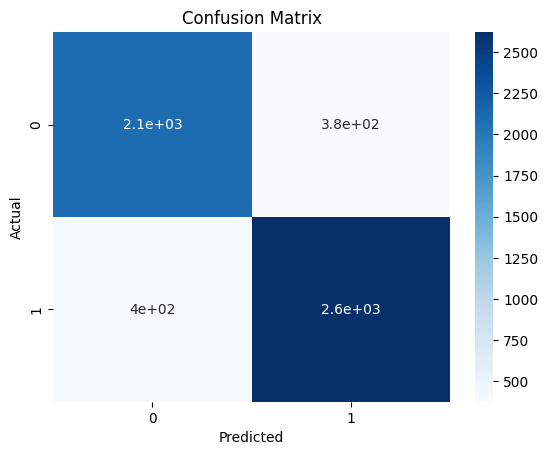

In [ ]:
sns.heatmap(cm, annot=True, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Armo la matriz de confusión para saber cuántas predicciones realizó correctamente y entender un poco mejor los resultados. Además veo otras métricas, dentro de ellas el AUC-ROC, la cual es la métrica objetivo.

In [ ]:
precision_score(y_validation, y_pred_val)

0.8745830553702468

In [ ]:
accuracy_score(y_validation, y_pred_val)

0.8591959250500273

In [ ]:
specificity_score = cm[0][0] / sum(cm[0])
specificity_score

0.8482034719418652

In [ ]:
sensibility_score = cm[1][1] / sum(cm[1])
sensibility_score

0.8682119205298013

In [ ]:
roc_auc_score(y_validation, model.predict_proba(X_validation)[:, 1])

0.9297513281126764

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


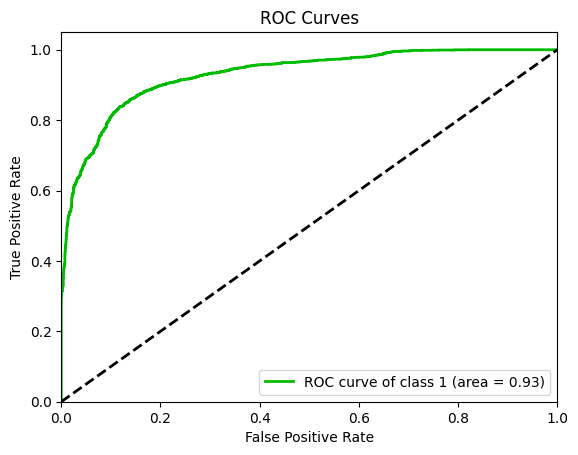

In [ ]:
!pip install scikit-plot
import scikitplot as skplt
import matplotlib.pyplot as plt

skplt.metrics.plot_roc(y_validation, model.predict_proba(X_validation),classes_to_plot= 1,plot_micro= False, plot_macro = False)
plt.show()

¿Cuál es el mejor score de validación obtenido? (¿Cómo conviene obtener el dataset para validar?)

El mejor score de validación obtenido fué el AUC-ROC-score (Area Under the ROC Curve), con un resultado de 0.93, lo que es considerado bastante bueno.

El proceso de división del dataset que realicé es el siguiente: Divido el dataset inicial en train_set_aux y test_set (90% y 10% respectivamente) donde los datos se eligen aleatoriamente ya que para este dataset no existen problemas de time-travelling. Una vez que tengo esos datasets divido el train_set_aux en train_set(90%) y validation_set(10%) para buscar los mejores hiperparámetros de mi modelo. Esto en realidad se hizo con Grid-Search como está explicado anteriormente. Finalmente, cuando obtengo los mejores hiperparámetros entreno a mi modelo con ellos y lo uso con el validation set para ver qué tan correctamente funciona y al final uso el test_set para ver su funcionamiento en la práctica, con datos "nuevos".

#Predicción para test

Al predecir con este modelo para test, ¿Cúal es el score obtenido? (guardar el csv con predicciones para entregarlo después)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
y_test = y_test.astype(int)

In [ ]:
cm_test = confusion_matrix(y_test, y_pred)
cm_test

array([[2264,  409],
       [ 521, 2913]])

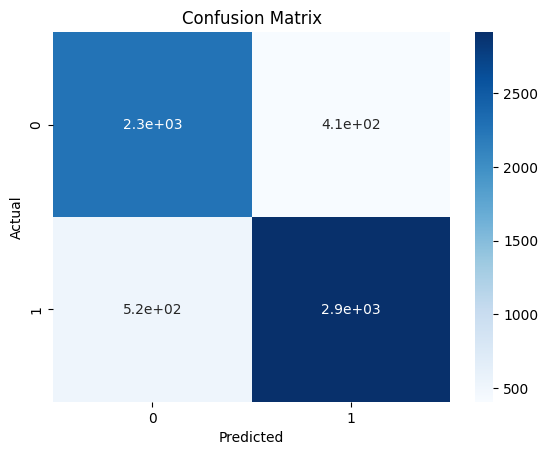

In [ ]:
sns.heatmap(cm_test, annot=True, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
precision_score(y_test, y_pred)

0.8768813967489464

In [ ]:
accuracy_score(y_test, y_pred)

0.8477157360406091

In [ ]:
specificity_score_test = cm_test[0][0] / sum(cm_test[0])
specificity_score_test

0.8469884025439581

In [ ]:
sensibility_score_test = cm_test[1][1] / sum(cm_test[1])
sensibility_score_test

0.8482818870122306

In [ ]:
roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])

0.922925625895923

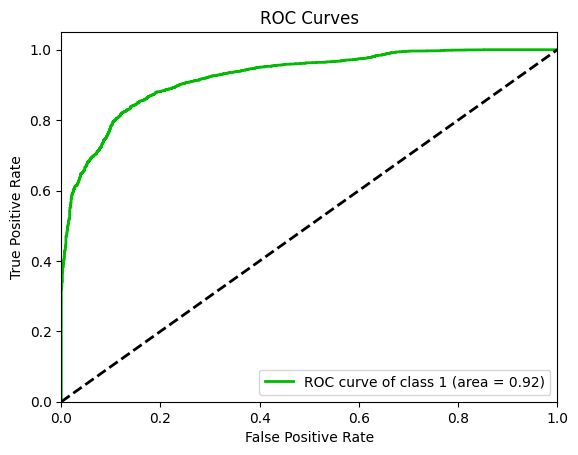

In [ ]:
skplt.metrics.plot_roc(y_test, model.predict_proba(X_test),classes_to_plot= 1,plot_micro= False, plot_macro = False)
plt.show()

In [ ]:
df_predic = pd.DataFrame({'y_test': y_validation, 'y_pred': y_pred_val})
df_predic.to_csv('/content/drive/MyDrive/predicciones_log_reg.csv')

# Features más importantes

¿Qué features son los más importantes para predecir con el mejor modelo? Graficar.

In [ ]:
features_imp = model.coef_
features_imp = features_imp.tolist()
features_imp = features_imp[0]
#features_imp

In [ ]:
def sum_abs_values(importances, begin, end):
  importance = 0
  for i in range(begin, end+1):
    importance += abs(importances[i])
  return importance

features_imp = model.coef_
features_imp = features_imp.tolist()
features_imp = features_imp[0]

features_importance = []
features_importance.append(abs(features_imp[0]))
features_importance.append(abs(features_imp[1]))
features_importance.append(abs(features_imp[2]))
features_importance.append(sum_abs_values(features_imp, 3, 6))
features_importance.append(sum_abs_values(features_imp, 7, 10))
features_importance.append(sum_abs_values(features_imp, 11, 14))
features_importance.append(sum_abs_values(features_imp, 15, 18))
features_importance.append(sum_abs_values(features_imp, 19, 25))
features_importance.append(sum_abs_values(features_imp, 26, 37))
features_importance.append(sum_abs_values(features_imp, 38, 39))
features_importance.append(sum_abs_values(features_imp, 40, 47))
features_importance.append(sum_abs_values(features_imp, 48, 51))
features_importance.append(sum_abs_values(features_imp, 52, 57))
features_importance.append(sum_abs_values(features_imp, 58, 66))
features_importance.append(sum_abs_values(features_imp, 67, 68))
features_importance.append(sum_abs_values(features_imp, 69, 75))
features_importance.append(sum_abs_values(features_imp, 76, 77))
features_importance.append(sum_abs_values(features_imp, 78, 85))
features_importance.append(sum_abs_values(features_imp, 86, 93))
features_importance.append(sum_abs_values(features_imp, 94, 97))

features_importance

[0.01834311302155887,
 0.1031680267910815,
 0.009069359755080946,
 2.4190603689454835,
 1.5225134203154624,
 12.53772864185451,
 6.195422751614903,
 7.139410599362932,
 10.762289759907235,
 5.423825709685302,
 12.736111000706153,
 5.423825709689608,
 37.098739684303084,
 37.71578185924161,
 12.302027222267872,
 47.02455357555719,
 5.423825709681028,
 33.93251216112401,
 20.19304598525799,
 5.4238257096887255]

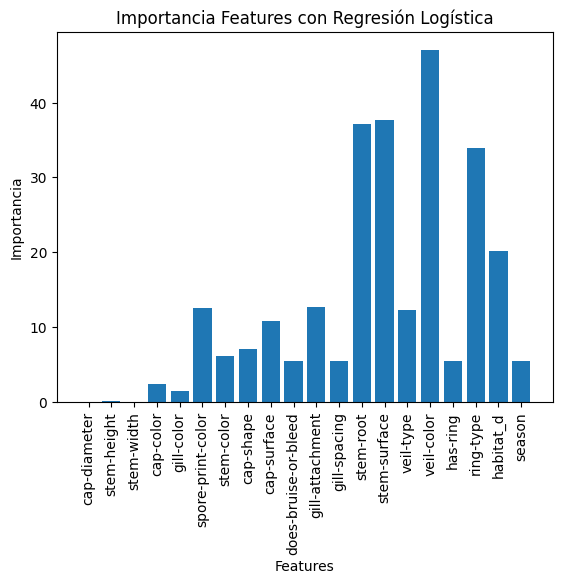

In [ ]:
features = ['cap-diameter','stem-height','stem-width','cap-color','gill-color','spore-print-color','stem-color',
       'cap-shape', 'cap-surface','does-bruise-or-bleed', 'gill-attachment', 'gill-spacing', 'stem-root',
       'stem-surface', 'veil-type','veil-color', 'has-ring', 'ring-type', 'habitat_d', 'season']
plt.bar(features, features_importance)
plt.xlabel('Features')
plt.xticks(rotation=90)
plt.ylabel('Importancia')
plt.title('Importancia Features con Regresión Logística')
plt.show()

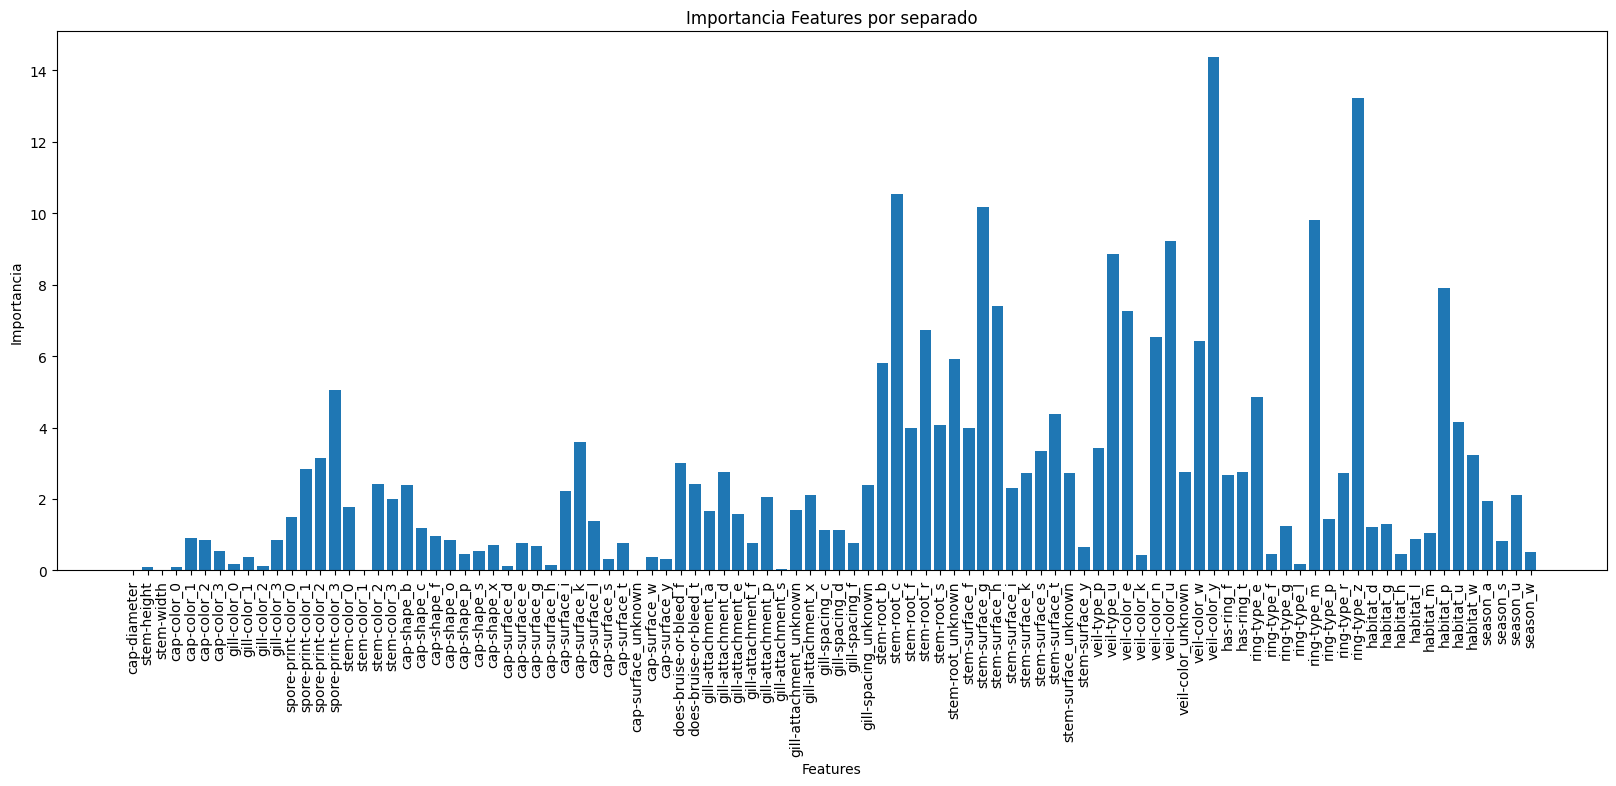

In [ ]:
plt.figure(figsize=(20,7))
plt.bar(X_train.columns, [abs(num) for num in features_imp])
plt.xlabel('Features')
plt.ylabel('Importancia')
plt.title('Importancia Features por separado')
plt.xticks(rotation=90)
plt.show()

Este último plot es para corroborar que la suma de las columnas de cada feature en el feature importance tengan sentido.